In [13]:
library("ggplot2")
library("directlabels")
library("ggrepel")

In [14]:
cwd = getwd()

threshold = "75"

data = read.csv(file=sprintf("%s/data/python_entropy_analysis/entropy_correlation_data_%sperc.csv", cwd,threshold))
data_df = data.frame(data)

In [15]:
data_df

X,Comp_Dis,A.Entropy,Labels,A.Hits,Comp_Behav,B.Entropy,B.Hits,r
<int>,<fct>,<dbl>,<fct>,<int>,<fct>,<dbl>,<int>,<dbl>
0,IC-01,0.7451684,Temporo-Limbic,19,IC-18,0.5909249,12,0.6153400
1,IC-02,0.6112560,Fronto-Striatal,15,IC-14,0.5808227,11,0.6151892
2,IC-03,0.7036485,Ventral Attention,15,IC-16,0.7721060,23,0.5234964
3,IC-11,0.5386594,Auditory,8,IC-07,0.4084267,6,0.5151314
4,IC-20,0.0000000,Medial Visual,0,IC-20,0.2717689,3,0.4819234
5,IC-09,0.5357182,Cognitive Control,8,IC-17,0.7083755,18,0.4161618
6,IC-12,0.7674083,Salience,21,IC-04,0.8210624,29,0.4313501
7,IC-07,0.4656765,R. Cent. Executive,6,IC-09,0.6671161,15,0.3885926
8,IC-16,0.7117750,L. Cent. Executive,16,IC-03,0.7165799,20,0.3359827



Call:
lm(formula = data_df$B.Entropy ~ data_df$A.Entropy)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17514 -0.07436 -0.02502  0.09444  0.15706 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)   
(Intercept)        0.25910    0.08499   3.049  0.00932 **
data_df$A.Entropy  0.60235    0.14748   4.084  0.00129 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1049 on 13 degrees of freedom
Multiple R-squared:  0.562,	Adjusted R-squared:  0.5283 
F-statistic: 16.68 on 1 and 13 DF,  p-value: 0.001291


[1] "P-Values of Coefficients"


(Intercept) data_df$A.Entropy 
     0.0046610468      0.0006454035

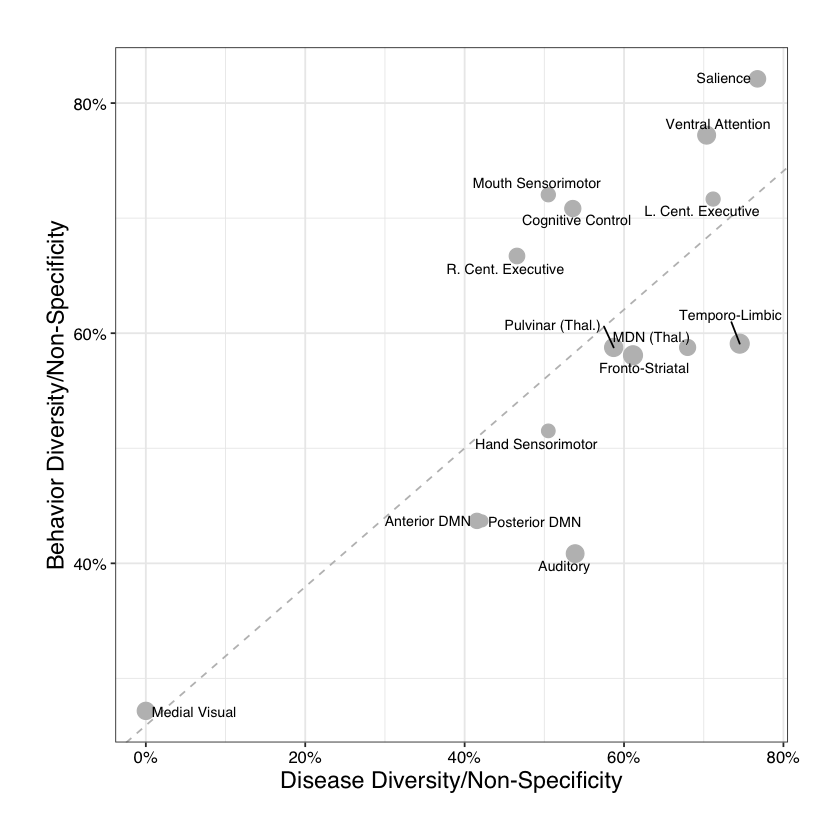

In [16]:
lm = lm(data_df$B.Entropy~data_df$A.Entropy)
# lm = lm(data_df$B.Hits~data_df$A.Hits)
res <- summary(lm)
summary(lm)

# p-values
print("P-Values of Coefficients")
pt(coef(res)[, 3], lm$df, lower = FALSE)

# linear model plot
p <- ggplot(data_df, aes(A.Entropy,B.Entropy))
# p <- ggplot(data_df, aes(A.Hits,B.Hits))

# plot linear model
p <- p + geom_abline(intercept = lm$coefficients[1], slope = lm$coefficients[2], lty=2, col="gray")

# linear model color scale
  p <- p + geom_point(aes(size = data_df$r),colour="gray",show.legend=FALSE) + 
    scale_size_continuous(range=c(3,5)) + #size points according to correlation
    geom_text_repel(aes(label=data_df$Labels), size = 3, family="Helvetica") + #add data labels without overlap
    ylab("Behavior Diversity/Non-Specificity") +
    xlab("Disease Diversity/Non-Specificity") + 
    theme_bw() + #remove gray background
    #coord_fixed(ratio = 1) + 
    #scale_color_gradient(low = "#0091ff", high = "#f0650e") +
    theme(plot.margin=unit(c(1,1.1,1,1),"cm")) + 
    scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +
    scale_x_continuous(labels = scales::percent_format(accuracy = 1)) +
    theme(axis.text.x = element_text(color = "black", size = 10, face = "plain", family="Helvetica"),
          axis.text.y = element_text(color = "black", size = 10, face = "plain", family="Helvetica"),  
          axis.title.x = element_text(color = "black", size = 14, face = "plain", family="Helvetica"),
          axis.title.y = element_text(color = "black", size = 14, face = "plain", family="Helvetica"))
  
p 

ggsave(sprintf("%s/figures/linear_model_%sperc.png",cwd,threshold), width = 4.5, height = 4, units = "in", dpi = 500)


Call:
lm(formula = data_df$B.Entropy ~ data_df$A.Entropy)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17237 -0.06782 -0.03412  0.09134  0.16117 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)  
(Intercept)         0.2348     0.1508   1.557   0.1453  
data_df$A.Entropy   0.6423     0.2528   2.541   0.0259 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.109 on 12 degrees of freedom
Multiple R-squared:  0.3498,	Adjusted R-squared:  0.2956 
F-statistic: 6.455 on 1 and 12 DF,  p-value: 0.02591


[1] "P-Values of Coefficients"


(Intercept) data_df$A.Entropy 
       0.07266570        0.01295338

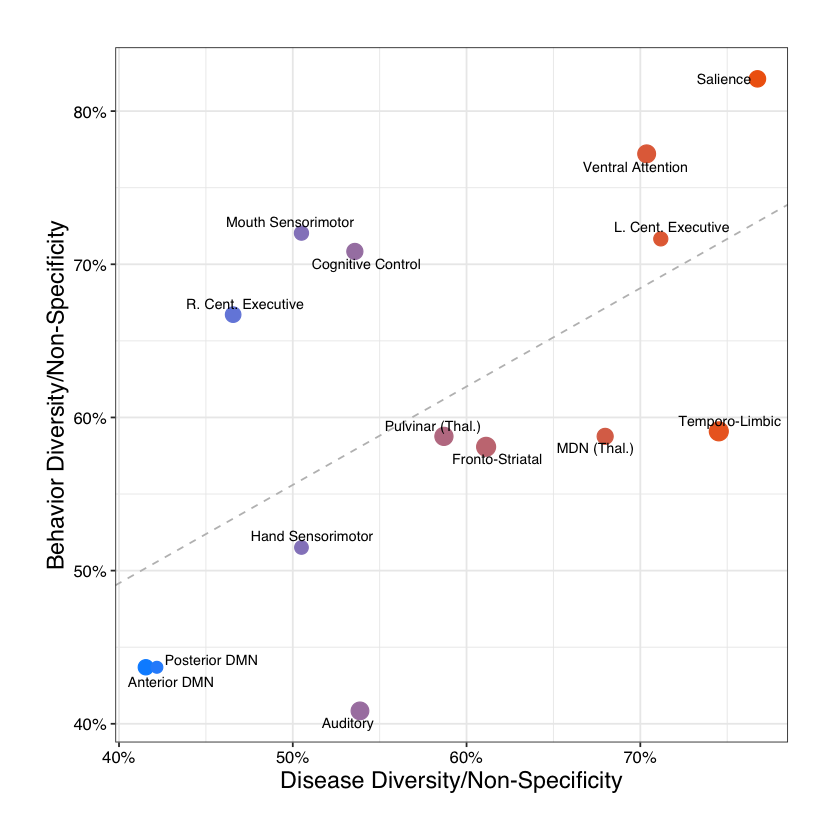

In [17]:
# create linear model (without medial visual)
data_df <- data_df[-c(5), ]
lm = lm(data_df$B.Entropy~data_df$A.Entropy)
# lm = lm(data_df$B.Hits~data_df$A.Hits)
res <- summary(lm)
summary(lm)

# p-values
print("P-Values of Coefficients")
pt(coef(res)[, 3], lm$df, lower = FALSE)

# linear model plot
p <- ggplot(data_df, aes(A.Entropy,B.Entropy))

# plot linear model 
p <- p + geom_abline(intercept = lm$coefficients[1], slope = lm$coefficients[2], lty=2, col="gray")

# linear model color scale
  p <- p + geom_point(aes(size = data_df$r, color = lm$fitted.values), show.legend=FALSE) + 
    scale_size_continuous(range=c(3,5)) + #size points according to correlation
    geom_text_repel(aes(label=data_df$Labels), size = 3, family="Helvetica") + #add data labels without overlap
    ylab("Behavior Diversity/Non-Specificity") +
    xlab("Disease Diversity/Non-Specificity") + 
    theme_bw() + #remove gray background
    #coord_fixed(ratio = 1) + 
    theme(plot.margin=unit(c(1,1.1,1,1),"cm")) + 
    scale_color_gradient(low = "#0091ff", high = "#f0650e") +
    scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +
    scale_x_continuous(labels = scales::percent_format(accuracy = 1)) +
    theme(axis.text.x = element_text(color = "black", size = 10, face = "plain", family="Helvetica"),
          axis.text.y = element_text(color = "black", size = 10, face = "plain", family="Helvetica"),  
          axis.title.x = element_text(color = "black", size = 14, face = "plain", family="Helvetica"),
          axis.title.y = element_text(color = "black", size = 14, face = "plain", family="Helvetica"))
  
p 

ggsave(sprintf("%s/figures/linear_model_%sperc_nomedvis.png",cwd,threshold), width = 4.5, height = 4, units = "in", dpi = 500)